In [43]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt

In [ ]:
root_dir = '/Users/cjk/Documents/Purdue/BME450/Dataset_BUSI_with_GT/Train' #Change to your dataset path


In [46]:
class ImageFolderDataset(Dataset):
    def __init__(self, root_dir, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {self.classes[i]: i for i  in range(len(self.classes))}
        self.image_paths = []
        self.labels = []

        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name, 'train', 'train1')
            if os.path.isdir(class_dir):
                for image_path in glob.glob(os.path.join(class_dir, '*.png')):
                    filename = os.path.basename(image_path)  # Extract filename
                    if "_mask" in filename:  
                        #print(f"Skipping: {image_path}")  # Debugging: Check skipped files
                        continue  # Skip images with '_mask' in the filename
                    self.image_paths.append(image_path)
                    self.labels.append(self.class_to_idx[class_name])

    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        label = label - 1

        if self.transform:
            image = self.transform(image)

        if self.target_transform:
            label = self.target_transform(label)

        return image, label, img_path

In [47]:
transform = transforms.Compose([
    transforms.Resize((500, 500)), 
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [48]:
training_data = ImageFolderDataset(root_dir, transform=transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0355594..5.410983].


Inputs sample - image size: torch.Size([3, 500, 500])
Label: 2 

Inputs sample - min,max,mean,std: -0.8823529481887817 1.0 -0.36779987812042236 0.2527821362018585
Inputs sample normalized - min,max,mean,std: -2.0355594158172607 5.410983085632324 3.1249999921101335e-08 1.0


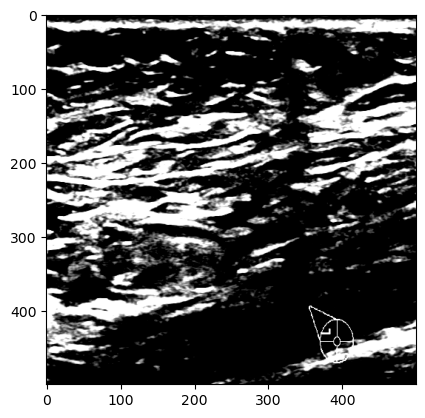

In [58]:
categories = ['benign', 'malignant', 'normal']

# select a random sample from the training set
sample_num = 24
# print(training_data[sample_num])
print('Inputs sample - image size:', training_data[sample_num][0].shape)
print('Label:', training_data[sample_num][1], '\n')

import matplotlib.pyplot as plt

ima = training_data[sample_num][0]
print('Inputs sample - min,max,mean,std:', ima.min().item(), ima.max().item(), ima.mean().item(), ima.std().item())
ima = (ima - ima.mean())/ ima.std()
print('Inputs sample normalized - min,max,mean,std:', ima.min().item(), ima.max().item(), ima.mean().item(), ima.std().item())
iman = ima.permute(1, 2, 0) # needed to be able to plot
plt.imshow(iman)

In [59]:
training_data[sample_num][2]

'/Users/cjk/Documents/Purdue/BME450/Dataset_BUSI_with_GT/Train/normal/train/train1/normal (114).png'